# GPU 사용 설정

In [120]:
# gpu 사용 유무 설정
import os
import gc
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,2,3" # "0, 1, 2, 3"
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '2'

gc.collect()
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), 'Physical GPUs', len(logical_gpus), 'Logical GPUs')
    except RuntimeError as e:
        print(e)

4 Physical GPUs 4 Logical GPUs


# Data Load

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [122]:
# label data load
labels = pd.read_csv('./Dataset/data.csv')
labels = labels.set_index('Index')
labels

,Aneurysm,L_ICA,R_ICA,L_PCOM,R_PCOM,L_AntChor,R_AntChor,L_ACA,R_ACA,L_ACOM,...,R_MCA,L_VA,R_VA,L_PICA,R_PICA,L_SCA,R_SCA,BA,L_PCA,R_PCA
Index,,,,,,,,,,,,,,,,,,,,,
1001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1002,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1004,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1005,1,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2607,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2608,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
y_target = labels['Aneurysm']
y_target.head()

Index
1001    0
1002    1
1004    1
1005    1
1006    0
Name: Aneurysm, dtype: int64

In [124]:
img_index = y_target.index
img_index

Index([1001, 1002, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011,
       ...
       2602, 2603, 2604, 2605, 2606, 2607, 2608, 2609, 2610, 2611],
      dtype='int64', name='Index', length=1127)

In [125]:
from keras.utils import load_img

image_directory = './Dataset/images'
image_category = ['LI-A', 'LI-B', 'LV-A', 'LV-B', 'RI-A', 'RI-B', 'RV-A', 'RV-B']


### 512 x 512 로 imgae load

In [11]:
imgs_data_512 = []
for category in image_category:
    imgs = []
    for index in img_index:
        img = load_img(image_directory + '/' + str(index) + category + '.jpg', target_size=(512, 512), color_mode='grayscale')
        img = np.reshape(img, (512, 512, 1))
        imgs.append(img)
    imgs = np.stack(imgs, axis=0)
    imgs_data_512.append(imgs)

In [126]:
print(imgs_data_512[0].shape, y_target.shape)
len(imgs_data_512)

(1127, 512, 512, 1) (1127,)


8

In [127]:
np.bincount(y_target)

array([604, 523])

In [128]:
np.unique(y_target, return_counts=True)

(array([0, 1]), array([604, 523]))

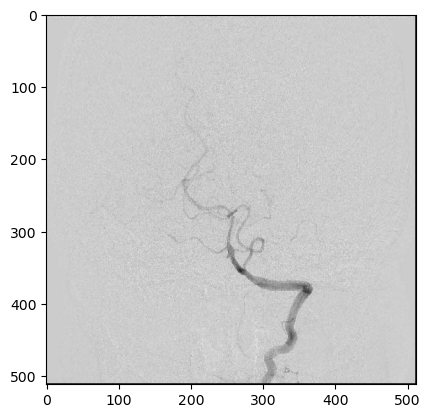

In [129]:
# 이미지 확인
rand_n = np.random.randint(0, len(image_category))
plt.imshow(imgs_data_512[rand_n][0], cmap='gray')
plt.show()

### 256 x 256 image load

In [92]:
imgs_data_256 = []
for category in image_category:
    imgs = []
    for index in img_index:
        img = load_img(image_directory + '/' + str(index) + category + '.jpg', target_size=(256, 256), color_mode='grayscale')
        img = np.reshape(img, (256, 256, 1))
        imgs.append(img)
    imgs = np.stack(imgs, axis=0)
    imgs_data_256.append(imgs)

In [93]:
print(imgs_data_256[0].shape, y_target.shape)
len(imgs_data_256)

(1127, 256, 256, 1) (1127,)


8

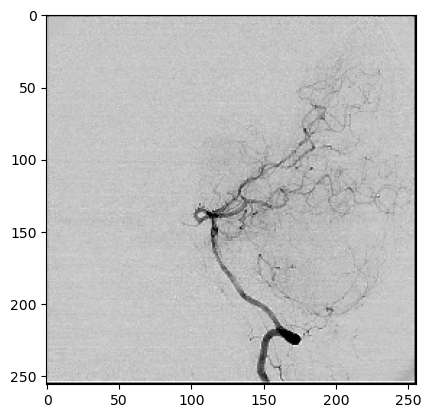

In [99]:
# 이미지 확인
rand_n = np.random.randint(0, len(image_category))
plt.imshow(imgs_data_256[rand_n][0], cmap='gray')
plt.show()

# Data preprocessing

## train_test_split

In [130]:
from sklearn.model_selection import train_test_split

x_train_all = []
x_test = []
y_train_all = []
y_test = []

for i in range(len(image_category)):
    x_tr_all, x_te, y_tr_all, y_te = train_test_split(imgs_data_512[i], y_target, test_size=0.2, stratify=y_target, random_state=42)
    x_train_all.append(x_tr_all)
    x_test.append(x_te)
    y_train_all= y_tr_all
    y_test = y_te


In [131]:
x_train_all[0].shape, x_test[0].shape, y_train_all.shape, y_test.shape

((901, 512, 512, 1), (226, 512, 512, 1), (901,), (226,))

In [132]:
x_train = []
x_val = []
y_train = []
y_val = []

for i in range(len(image_category)):
    x_tr, x_v, y_tr, y_v = train_test_split(x_train_all[i], y_train_all, test_size=0.2, stratify=y_train_all, random_state=42)
    x_train.append(x_tr)
    x_val.append(x_v)
    y_train = y_tr
    y_val = y_v

In [133]:
x_train[0].shape, x_val[0].shape, y_train.shape, y_val.shape

((720, 512, 512, 1), (181, 512, 512, 1), (720,), (181,))

In [134]:
np.bincount(y_train), np.bincount(y_val), np.bincount(y_test)

(array([386, 334]), array([97, 84]), array([121, 105]))

In [135]:
np.unique(y_train,  return_counts=True), np.unique(y_val,  return_counts=True), np.unique(y_test,  return_counts=True)

((array([0, 1]), array([386, 334])),
 (array([0, 1]), array([97, 84])),
 (array([0, 1]), array([121, 105])))

## Data augmentation

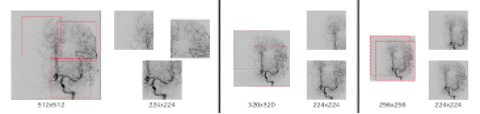

In [136]:
# resize 256 ~ 512 and crop 224x224
def resize_crop(x_train):
    imgs = []
    for x in x_train:
        target_size = tf.random.uniform([], 256, 513, dtype=tf.int32)
        resized_img = tf.image.resize(x, (target_size, target_size))
        cropped_img = tf.image.random_crop(resized_img, size=[224, 224, 1])
        imgs.append(cropped_img)
    return np.array(imgs)

In [233]:
combined_x_train = []
combined_y_train = []

for aug_cnt in range(3):
    aug_data = []
    for i in range(len(image_category)):
        cropped_img = resize_crop(x_train[i])
        cropped_img = cropped_img / 255.
        aug_data.append(np.array(cropped_img))
    if aug_cnt == 0:
        combined_x_train = aug_data
        combined_y_train = y_train
        print("aug_cnt:", aug_cnt, combined_x_train[0].shape, combined_y_train.shape)
    else:
        temp_x_train = []
        for i in range(len(image_category)):
            temp_x_train.append(np.vstack((combined_x_train[i], aug_data[i])))
        combined_x_train = temp_x_train
        combined_y_train = np.concatenate([combined_y_train, y_train])
        print("aug_cnt:", aug_cnt, combined_x_train[0].shape, combined_y_train.shape)

aug_cnt: 0 (720, 224, 224, 1) (720,)
aug_cnt: 1 (1440, 224, 224, 1) (1440,)
aug_cnt: 2 (2160, 224, 224, 1) (2160,)


In [236]:
combined_x_train[0][0]

array([[[0.7046146 ],
        [0.7079405 ],
        [0.71229064],
        ...,
        [0.60160846],
        [0.6037324 ],
        [0.641823  ]],

       [[0.70878875],
        [0.70628834],
        [0.7071465 ],
        ...,
        [0.62680984],
        [0.615088  ],
        [0.61868095]],

       [[0.7119824 ],
        [0.70609313],
        [0.7134739 ],
        ...,
        [0.65738857],
        [0.6364703 ],
        [0.6318395 ]],

       ...,

       [[0.70459014],
        [0.70089346],
        [0.7038201 ],
        ...,
        [0.7071042 ],
        [0.7109566 ],
        [0.7130005 ]],

       [[0.7045122 ],
        [0.6978962 ],
        [0.7038201 ],
        ...,
        [0.70577216],
        [0.70742714],
        [0.70682013]],

       [[0.71229476],
        [0.7035363 ],
        [0.70610124],
        ...,
        [0.70416534],
        [0.70211977],
        [0.71038485]]], dtype=float32)

In [237]:
np.bincount(combined_y_train)

array([1158, 1002])

(2160, 224, 224, 1)


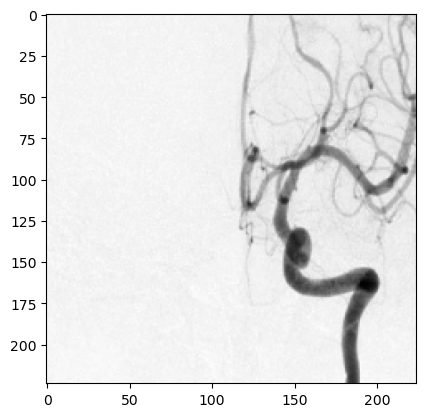

In [238]:
print(combined_x_train[0].shape)
plt.imshow(combined_x_train[0][0], cmap='gray')
plt.show()

## Data Normalization

In [141]:
## val, test set resize and Normalization

x_val_norm = []
x_test_norm = []

for i in range(len(image_category)):
    x_val_resize = tf.image.resize(x_val[i], (224, 224))
    x_val_resize = x_val_resize / 255.
    x_val_norm.append(np.array(x_val_resize))
    
    x_test_resize = tf.image.resize(x_test[i], (224, 224))
    x_test_resize = x_test_resize / 255.
    x_test_norm.append(np.array(x_test_resize))

In [142]:
x_val_norm[0].shape

(181, 224, 224, 1)

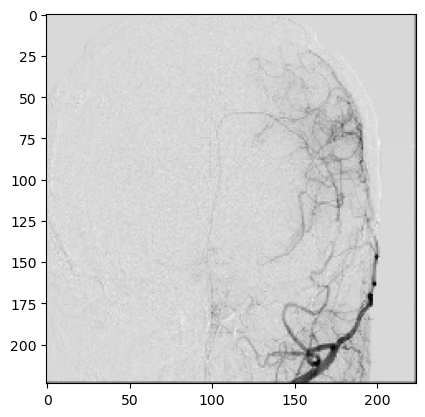

In [239]:
plt.imshow(x_val_norm[0][0],cmap='gray')
plt.show()

# Model Architecture

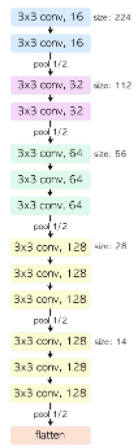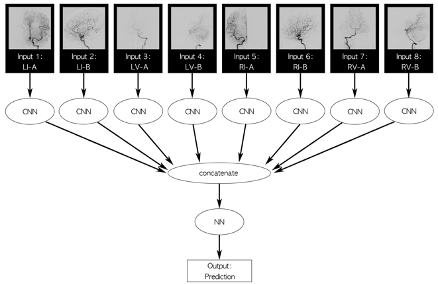
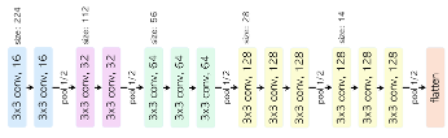
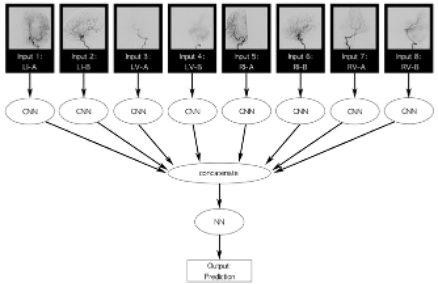

In [144]:
from keras import layers, regularizers
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, Flatten ,Dense, MaxPooling2D, BatchNormalization, Activation, AveragePooling2D
from keras.layers import concatenate
from keras.models import Model


In [145]:
def create_cnn():
    model = Sequential()
    
    model.add(keras.Input(shape=(224, 224, 1)))
    model.add(Conv2D(16, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(16, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    
    model.add(Conv2D(64, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(64, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(64, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    
    model.add(Conv2D(128, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(128, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(128, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    
    model.add(Conv2D(128, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(128, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(128, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    
    model.add(Flatten())

    return model
    

In [146]:
def create_combine_model():
    model = []
    for i in range(len(image_category)):
        cnn = create_cnn()
        model.append(cnn)
        
    outputs = []
    for i in range(len(image_category)):
        outputs.append(model[i].output)

    outputs = concatenate(outputs)

    outputs = Dropout(0.8)(outputs)
    outputs = Dense(128, kernel_regularizer=regularizers.l2(0.01))(outputs)
    outputs = BatchNormalization()(outputs)
    outputs = Activation('relu')(outputs)
    outputs = Dropout(0.5)(outputs)
    outputs = Dense(128, kernel_regularizer=regularizers.l2(0.01))(outputs)
    outputs = BatchNormalization()(outputs)
    outputs = Activation('relu')(outputs)
    outputs = Dropout(0.5)(outputs)
    outputs = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))(outputs)
    outputs = BatchNormalization()(outputs)
    outputs = Activation('relu')(outputs)

    outputs = Dense(1, activation='sigmoid')(outputs)


    inputs = []
    for i in range(len(image_category)):
        inputs.append(model[i].input)

    model = Model(inputs=inputs, outputs=outputs)
    model.summary()
    return model

In [240]:
from keras import optimizers
from keras.callbacks import EarlyStopping

batch_size = 64
epochs = 1000
loss = 'binary_crossentropy'
optimizer = optimizers.Adadelta(learning_rate=0.01)
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, mode='auto')
class_weight = {0: 0.5361, 1: 0.4639}

logical_gpus = tf.config.list_logical_devices('GPU')
strategy = tf.distribute.MirroredStrategy(logical_gpus)

with strategy.scope():
        model = create_combine_model()
        model.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])
        
history = model.fit(combined_x_train, combined_y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val_norm, y_val), callbacks=[early_stopping], shuffle=True, class_weight=class_weight)
gc.collect()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3')


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3')


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 input_18 (InputLayer)          [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 input_19 (InputLayer)          [(None, 224, 224, 1  0           []                               
                                )]                                                          

IOStream.flush timed out


                                                                                                  
 conv2d_226 (Conv2D)            (None, 56, 56, 64)   36928       ['activation_231[0][0]']         
                                                                                                  
 conv2d_239 (Conv2D)            (None, 56, 56, 64)   36928       ['activation_244[0][0]']         
                                                                                                  
 conv2d_252 (Conv2D)            (None, 56, 56, 64)   36928       ['activation_257[0][0]']         
                                                                                                  
 conv2d_265 (Conv2D)            (None, 56, 56, 64)   36928       ['activation_270[0][0]']         
                                                                                                  
 conv2d_278 (Conv2D)            (None, 56, 56, 64)   36928       ['activation_283[0][0]']         
          

INFO:tensorflow:batch_all_reduce: 430 all-reduces with algorithm = nccl, num_packs = 1


INFO:tensorflow:batch_all_reduce: 430 all-reduces with algorithm = nccl, num_packs = 1


INFO:tensorflow:batch_all_reduce: 430 all-reduces with algorithm = nccl, num_packs = 1


34/34 [==============================] - 549s 3s/step - loss: 82.0321 - accuracy: 0.4699 - val_loss: 82.0682 - val_accuracy: 0.5359
Epoch 2/1000
34/34 [==============================] - 19s 558ms/step - loss: 81.6810 - accuracy: 0.4843 - val_loss: 81.7259 - val_accuracy: 0.5580
Epoch 3/1000
34/34 [==============================] - 19s 549ms/step - loss: 81.3299 - accuracy: 0.4801 - val_loss: 81.3861 - val_accuracy: 0.5249
Epoch 4/1000
34/34 [==============================] - 19s 550ms/step - loss: 80.9996 - accuracy: 0.4843 - val_loss: 81.0477 - val_accuracy: 0.5028
Epoch 5/1000
34/34 [==============================] - 18s 544ms/step - loss: 80.6554 - accuracy: 0.4847 - val_loss: 80.7128 - val_accuracy: 0.4641
Epoch 6/1000
34/34 [==============================] - 19s 544ms/step - loss: 80.3316 - accuracy: 0.4704 - val_loss: 80.3807 - val_accuracy: 0.5193
Epoch 7/1000
34/34 [==============================] - 18s 543ms/step - loss: 79.9876 - accuracy: 0.4889 - val_loss: 80.0523 - val_acc

889471

In [284]:
#accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

KeyError: 'accuracy'

In [194]:
# model.save("model_final_weight_2")

INFO:tensorflow:Assets written to: model_final_weight_2/assets


INFO:tensorflow:Assets written to: model_final_weight_2/assets


In [246]:
model = keras.models.load_model("model_final_weight")

## Evaluate

In [280]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve

In [275]:
y_pred = model.predict(x_test_norm)

8/8 [==============================] - 1s 125ms/step


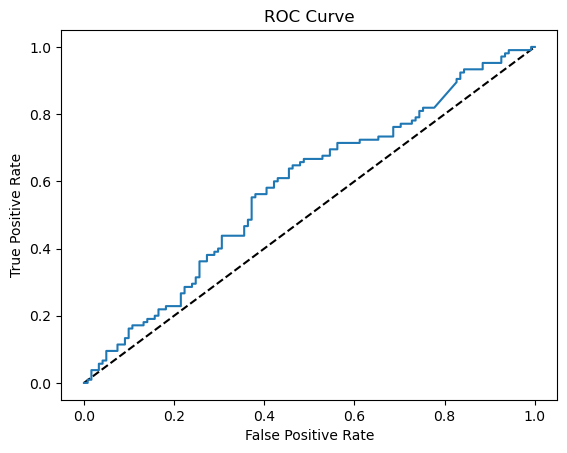

In [276]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [277]:
test_accuracy = []
for t in thresholds:
    test_accuracy.append(accuracy_score(y_test, y_pred > t))
test_accuracy = np.array(test_accuracy)
max_test_accuracy = test_accuracy.max()
max_test_accuracy_threshold = thresholds[test_accuracy.argmax()]


In [278]:
print("max_threshold:", max_test_accuracy_threshold)
print("max_accuracy:", max_test_accuracy)

max_threshold: 0.887276
max_accuracy: 0.5929203539823009


In [281]:
classification_report = classification_report(y_test, y_pred > max_test_accuracy_threshold)
print(classification_report)

              precision    recall  f1-score   support

           0       0.62      0.63      0.62       121
           1       0.56      0.55      0.56       105

    accuracy                           0.59       226
   macro avg       0.59      0.59      0.59       226
weighted avg       0.59      0.59      0.59       226



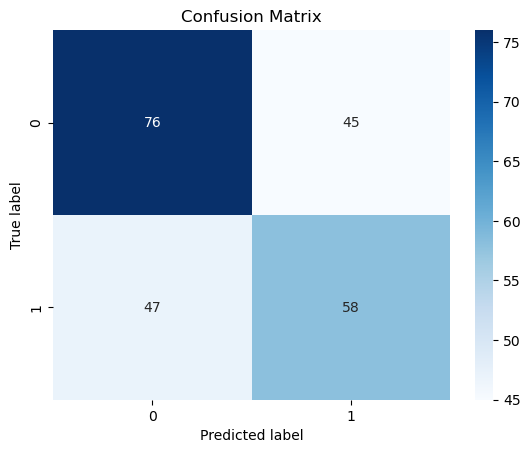

In [282]:
import seaborn as sns
y_pred_confusion = y_pred > max_test_accuracy_threshold
confusion_matrix = confusion_matrix(y_test.values, y_pred_confusion)

sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()